# **Sea Level Predictor from FreeCodeCamp** 🌊
This is the Sea Level Predictor project from the Data Analysis for Python course on FreeCodeCamp. 

Although this is the project and the data from this notebook is from the project, I adjusted the codes for my personal use and enjoyment for data exploration and forecasting. I used other metrics and visualizations on this project too.

I will be comparing 2 models to test their forecasting with each other ARIMA and the Linear Regression Model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

### **Data Analysis Part**

In [2]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


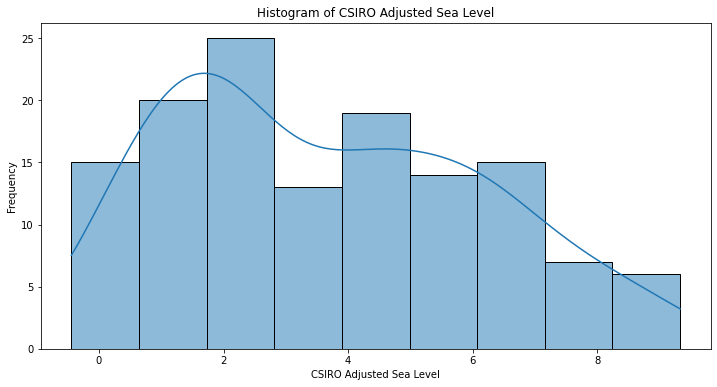

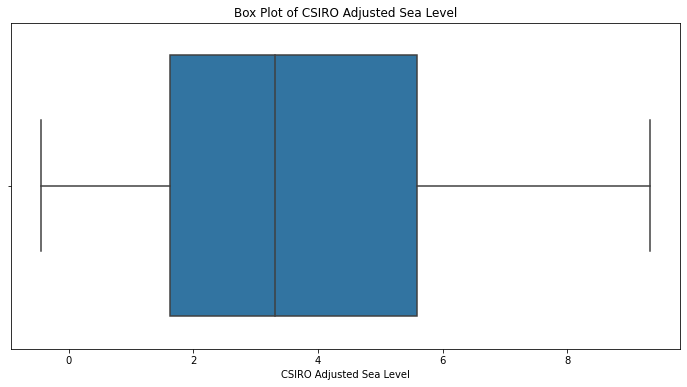

In [72]:
  # Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['CSIRO Adjusted Sea Level'], kde=True)
plt.title(f'Histogram of CSIRO Adjusted Sea Level')
plt.xlabel('CSIRO Adjusted Sea Level')
plt.ylabel('Frequency')
plt.show()

    # Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['CSIRO Adjusted Sea Level'])
plt.title(f'Box Plot of CSIRO Adjusted Sea Level')
plt.xlabel('CSIRO Adjusted Sea Level')
plt.show()

Based on the plots in this visualization. The histogram shows that the data has a lot more of lower level values it is skewed to the right and the mean will be higher than the median value of the dataset. The histogram is bimodal in its distribution which means there are might be two distinct group or processes within the data. The data also shows it is relatively continous and there are no unrepresented intervals within the data.

The boxplots are also consistent with the histogram data.



**Sea Level Predictor using Data Analysis**

In this section, I will create a scatter plot of the CSIRO Adjusted Sea Level data (blue points) and also overlap the scatter plot of the NOAA Adjusted Sea Level data (green points) that starts from 2000.

Then I will calculate 2 best fit line for the CSIRO Adjusted Sea Level data using linear regression. This line uses all the data points in the dataset. I will also calculate the second line of best fit for the CSIRO Adjusted Sea Level data using linear regression, this line will usesdata points from the year 2000 and onwards.

I will also fill the area between the Lower Error Bound and Upper Error Bound for the CSIRO Adjusted Sea Level data with a gray color to indicate uncertainty of the sea level measurement.

<ipython-input-3-707688c059f3>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x2, intercept2 + slope2 * x2, 'r', color = 'orange', label='fitted line 2')
<ipython-input-3-707688c059f3>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x2, intercept2 + slope2 * x2, 'r', color = 'gold', label='NOAA fitted line 2')


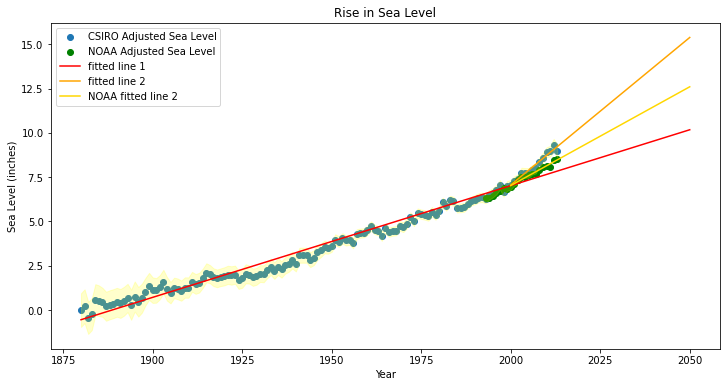

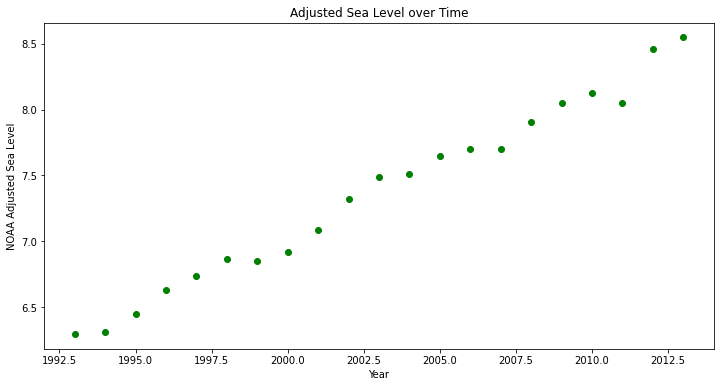

In [3]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Scatter plot of the original data
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='CSIRO Adjusted Sea Level')
plt.scatter(df['Year'], df['NOAA Adjusted Sea Level'], color='g', label='NOAA Adjusted Sea Level')

# Create first line of best fit
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
x1 = range(df["Year"].min(), 2051)
plt.plot(x1, intercept1 + slope1 * x1, 'r', label='fitted line 1')

# Create second line of best fit
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df[df["Year"] >= 2000]["Year"], df[df["Year"] >= 2000]["CSIRO Adjusted Sea Level"])
x2 = range(2000, 2051)
plt.plot(x2, intercept2 + slope2 * x2, 'r', color = 'orange', label='fitted line 2')

# Create a line of best fit for NOAA values
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df[df["Year"] >= 2000]["Year"], df[df["Year"] >= 2000]["NOAA Adjusted Sea Level"])
x2 = range(2000, 2051)
plt.plot(x2, intercept2 + slope2 * x2, 'r', color = 'gold', label='NOAA fitted line 2')


# Fill between the error bounds
plt.fill_between(df["Year"], df["Lower Error Bound"], df["Upper Error Bound"], color='yellow', alpha=0.2)

# Add labels, title, and legend
plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.legend()

# Show the plot
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['NOAA Adjusted Sea Level'], color='g', label='NOAA Adjusted Sea Level')
plt.xlabel('Year')
plt.ylabel('NOAA Adjusted Sea Level')
plt.title('Adjusted Sea Level over Time')
plt.show()

**Analysis of the Data:**

Both datasets is showing a similar upward trend, indicating that sea levels have been rising over the years.

* Comparing the two lines of best fit for the CSIRO Adjusted Sea Level
data, The first line represents the overall trend in the entire dataset, while the second line represents the trend from the year 2000 onwards. The second line (2000 onwards), is showing steeper slope than the first line, this suggests that the rate of sea level rise has increased in recent years.


* The error bounds (in yellow) seen in the graph shows the uncertainty of the data as time passes and it shows here that the uncertainty is very low starting from 1975 onwards showing the reliability of the dataset in this analysis.

* If you compare the CSIRO Dataset with the NOAA dataset, it seems that the NOAA dataset has a less steeper slope compared to the CSIRO dataset meaning NOAA reported a lower increase in sea level compared to CSIRO.


### **Quantitative comparison of the two datasets**

I will be computing for the quantitative metrics for the data to validate the results. These will be the metrics that I will use:

* **Root Mean Squared Error (RMSE)**: A measure of a model's prediction accuracy. By using the square root of the mean of the squared errors, it calculates the average deviation of the projected values from the actual values. In other words, it calculates the average difference between anticipated and actual values and is frequently used to evaluate various models to see which has lesser mistakes. [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

* **Mean Absolute Error (MAE)**: This metric gauges how accurately a model predicts the future. Without taking into account the direction of the mistakes, it calculates the average absolute difference between the anticipated values and the actual values. It is frequently used as a less complex substitute for the RMSE. [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error)

* **Mean Squared Error (MSE)**: This is a metric that is comparable to RMSE. Because to the fact that it penalizes greater errors more severely than smaller errors, it is frequently used in conjunction with RMSE.[MSE](https://en.wikipedia.org/wiki/Mean_squared_error)

* **Correlation coefficient (R)**: The strength and direction of the linear relationship between two variables are measured by this statistic. It is frequently used to gauge how well the model's forecasts correspond to the data while evaluating models.[Correlation Coefficient](https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/)

* **Coefficient of determination (R-squared)**: The percentage of the variance in the dependent variable that is explained by the independent variable is used to calculate this indicator of how well a model fits the data. It is frequently used to contrast many models to determine which one best fits the data.[Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

* **Mean Absolute Percentage Error (MAPE)**: This measures the average percentage difference between the predicted values and the actual values of a data. It is often used to evaluate the accuracy of models that predict values that are relative to the actual values, such as percentages or ratios.[MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)

**Error Metrics**

In [4]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mape(y_true, y_pred):
    mask = y_true != 0
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]
    return np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100


# Predictions for CSIRO data
y_pred_csiro1 = intercept1 + slope1 * df["Year"]
y_pred_csiro2 = intercept2 + slope2 * df[df["Year"] >= 2000]["Year"]

# Predictions for NOAA data
y_pred_noaa = intercept2 + slope2 * df[df["Year"] >= 2000]["Year"]

# Calculate performance metrics for each fitted line
print("CSIRO (entire dataset):")
print("MAE:", mae(df["CSIRO Adjusted Sea Level"], y_pred_csiro1))
print("MSE:", mse(df["CSIRO Adjusted Sea Level"], y_pred_csiro1))
print("RMSE:", rmse(df["CSIRO Adjusted Sea Level"], y_pred_csiro1))
print("MAPE:", mape(df["CSIRO Adjusted Sea Level"], y_pred_csiro1))

print("\nCSIRO (2000 onwards):")
print("MAE:", mae(df[df["Year"] >= 2000]["CSIRO Adjusted Sea Level"], y_pred_csiro2))
print("MSE:", mse(df[df["Year"] >= 2000]["CSIRO Adjusted Sea Level"], y_pred_csiro2))
print("RMSE:", rmse(df[df["Year"] >= 2000]["CSIRO Adjusted Sea Level"], y_pred_csiro2))
print("MAPE:", mape(df[df["Year"] >= 2000]["CSIRO Adjusted Sea Level"], y_pred_csiro2))

print("\nNOAA (2000 onwards):")
print("MAE:", mae(df[df["Year"] >= 2000]["NOAA Adjusted Sea Level"], y_pred_noaa))
print("MSE:", mse(df[df["Year"] >= 2000]["NOAA Adjusted Sea Level"], y_pred_noaa))
print("RMSE:", rmse(df[df["Year"] >= 2000]["NOAA Adjusted Sea Level"], y_pred_noaa))
print("MAPE:", mape(df[df["Year"] >= 2000]["NOAA Adjusted Sea Level"], y_pred_noaa))

CSIRO (entire dataset):
MAE: 0.3312830755737827
MSE: 0.18553059803434588
RMSE: 0.4307326294052331
MAPE: 20.468743949907402

CSIRO (2000 onwards):
MAE: 0.39274153892856967
MSE: 0.2254025275141662
RMSE: 0.47476576068011284
MAPE: 4.603698946795779

NOAA (2000 onwards):
MAE: 0.06915745767817587
MSE: 0.007506377055387306
RMSE: 0.08663935050187822
MAPE: 0.8968769558690476


**Correlation**

In [5]:
from scipy.stats import linregress
# Drop missing values (NaN) in the datasets
df_clean = df.dropna(subset=['CSIRO Adjusted Sea Level', 'NOAA Adjusted Sea Level'])

# Filter the data to include only records from the year 2000 onwards
df_filtered = df_clean[df_clean['Year'] >= 2000]

# Extract the years and sea level measurements for both datasets
years = df_filtered['Year']
CSIRO_sea_levels = df_filtered['CSIRO Adjusted Sea Level']
NOAA_sea_levels = df_filtered['NOAA Adjusted Sea Level']

In [6]:
# Calculate the linear regression for the CSIRO dataset
CSIRO_slope, CSIRO_intercept, CSIRO_r_value, CSIRO_p_value, CSIRO_std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Calculate the linear regression for the CSIRO dataset
CSIRO_slope1, CSIRO_intercept1, CSIRO_r_value1, CSIRO_p_value1, CSIRO_std_err1 = linregress(years, CSIRO_sea_levels)

# Calculate the linear regression for the NOAA dataset
NOAA_slope, NOAA_intercept, NOAA_r_value, NOAA_p_value, NOAA_std_err = linregress(years, NOAA_sea_levels)

In [7]:
print("CSIRO Dataset (entire dataset):")
print(f"Slope (rate of sea level rise): {CSIRO_slope:.4f} inches/year")
print(f"Correlation coefficient: {CSIRO_r_value:.4f}")
print(f"Coefficient of determination (R-squared): {CSIRO_r_value**2:.4f}")

print("\nCSIRO Dataset (2000 onwards):")
print(f"Slope (rate of sea level rise): {CSIRO_slope1:.4f} inches/year")
print(f"Correlation coefficient: {CSIRO_r_value1:.4f}")
print(f"Coefficient of determination (R-squared): {CSIRO_r_value1**2:.4f}")

print("\nNOAA Dataset (2000 onwards):")
print(f"Slope (rate of sea level rise): {NOAA_slope:.4f} inches/year")
print(f"Correlation coefficient: {NOAA_r_value:.4f}")
print(f"Coefficient of determination (R-squared): {NOAA_r_value**2:.4f}")

CSIRO Dataset (entire dataset):
Slope (rate of sea level rise): 0.0630 inches/year
Correlation coefficient: 0.9848
Coefficient of determination (R-squared): 0.9697

CSIRO Dataset (2000 onwards):
Slope (rate of sea level rise): 0.1664 inches/year
Correlation coefficient: 0.9763
Coefficient of determination (R-squared): 0.9531

NOAA Dataset (2000 onwards):
Slope (rate of sea level rise): 0.1115 inches/year
Correlation coefficient: 0.9819
Coefficient of determination (R-squared): 0.9642


### **Results**
**For the CSIRO data (entire data):**

* The rate of sea level rise (slope) is 0.0630 inches/year.

* The correlation coefficient is 0.9848, indicating a very strong positive relationship between the years and sea level rise.

* The coefficient of determination (R-squared) is 0.9697, meaning that about 96.97% of the variation in sea level rise can be explained by the passage of years.

**For the CSIRO data (2000 onwards):**

* The rate of sea level rise (slope) is 0.1664 inches/year.

* The correlation coefficient is 0.9763, indicating a very strong positive relationship between the years and sea level rise.

* The coefficient of determination (R-squared) is 0.9531, meaning that about 95.31% of the variation in sea level rise can be explained by the passage of years.

**For the NOAA data (2000 onwards):**

* The rate of sea level rise (slope) is 0.1115 inches/year.

* The correlation coefficient is 0.9819, indicating an even stronger positive relationship between the years and sea level rise compared to the CSIRO dataset.

* The coefficient of determination (R-squared) is 0.9642, meaning that about 96.42% of the variation in sea level rise can be explained by the passage of years.

***The results show a strong positive correlation between years and sea level rise. However, there are differences in the slope (rate of sea level rise) between the two datasets. The NOAA data has a less steep slope (0.1115 inches/year), whereas the CSIRO data has a greater slope (0.1664 inches/year). This demonstrates that the CSIRO dataset, as compared to the NOAA dataset, shows that the sea level has been rising more rapidly since 2000. High R-squared values and correlation coefficients for both datasets show that the linear regression computations were successful in fitting the data.***

**CSIRO (entire dataset):**

* MAE: 0.3312830755737827

* MSE: 0.18553059803434588

* RMSE: 0.4307326294052331

* MAPE: 20.468743949907402%


**CSIRO (2000 onwards):**

* MAE: 0.39274153892856967

* MSE: 0.2254025275141662

* RMSE: 0.47476576068011284

* MAPE: 4.603698946795779%

**NOAA (2000 onwards):**

* MAE: 0.06915745767817587

* MSE: 0.007506377055387306

* RMSE: 0.08663935050187822

* MAPE: 0.8968769558690476%

***Also, based on the error metrics, results show that the NOAA dataset's fitted line (2000 onwards) has the lowest errors among the three lines. The MAPE is much lower than the other two lines, indicating that the NOAA dataset's fit (2000 onwards) has the best overall performance in terms of relative errors.***

### **Linear Regression Machine Learning Model**

In this section, I will create a machine learning model to forecast the rise in sea level based on the Linear Regression algorithm from SciKitLearn. I will then compare the metrics of this model to the previous analysis above to compare which model did best.

In [8]:
from sklearn.linear_model import LinearRegression
# Convert the 'Year' column to integers
df['Year'] = df['Year'].astype(int)

X = df['Year'].values.reshape(-1, 1)
y = df['CSIRO Adjusted Sea Level'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create a Linear Regression object and fit it to the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test)

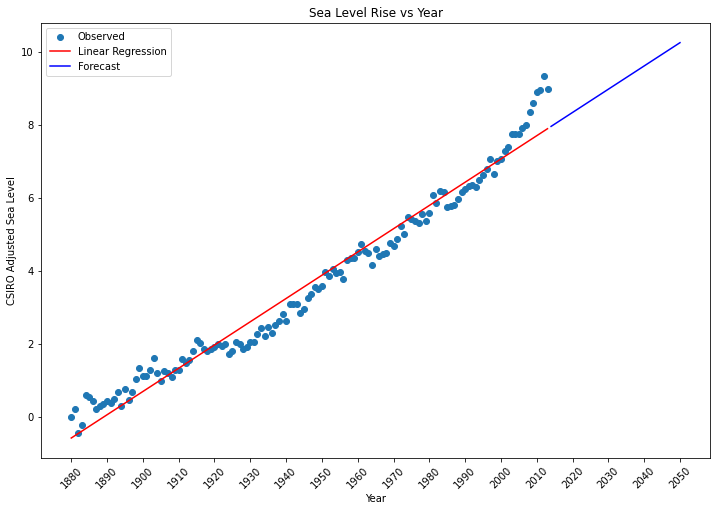

In [10]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Scatter plot of the original data
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Observed')

# Calculate the regression line
regression_line = lin_reg.predict(X)

# Plot the regression line
plt.plot(df['Year'], regression_line, color='red', label='Linear Regression')

# Forecast up to 2100
forecast_start_year = df['Year'].max() + 1
forecast_end_year = 2050
forecast_years = np.arange(forecast_start_year, forecast_end_year + 1).reshape(-1, 1)
forecast_sea_level = lin_reg.predict(forecast_years)
plt.plot(forecast_years, forecast_sea_level, color='blue', label='Forecast')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.title('Sea Level Rise vs Year')
plt.legend()

# Customize x-axis ticks
start_year = df['Year'].min()
end_year = 2050
plt.xticks(np.arange(start_year, end_year + 1, step=10), rotation=45)

# Show the plot
plt.show()

In [11]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient (R) and p-value
correlation_coefficient, _ = pearsonr(y_test, y_pred)

# Calculate the coefficient of determination (R-squared)
r_squared = lin_reg.score(X_test, y_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Correlation coefficient (R): {correlation_coefficient:.4f}")
print(f"Coefficient of determination (R-squared): {r_squared:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Root Mean Squared Error (RMSE): 0.40684224091895277
Mean Absolute Error: 0.3376338638511129
Mean Squared Error: 0.16552060899595522
Correlation coefficient (R): 0.9849
Coefficient of determination (R-squared): 0.9651
Mean Absolute Percentage Error (MAPE): 23.54926749576435%


**Result**

The initial analysis outperformed this model according to the findings The inital analysis scored a lower MAPE (20.468743949907402 %) compared to this model. Although the best performing model is still only factoring the rise in sea level from 2000 onwards. Despite the relatively low error values (RMSE, MAE, and MSE), indicating that the model's predictions are accurate, the high R and R-squared values indicate a significant linear correlation between the predicted and actual values. However, the MAPE score of 23.55% implies that, depending on the specific prediction accuracy requirements for the application, there may be room for enhancement.


# **ARIMA Model**

ARIMA (AutoRegressive Integrated Moving Average) is a type of time series model that helps predict future values based on patterns and trends from past data.

The model is built by first, analyzing the patterns and trends in the time series data to identify any seasonality or cyclic behavior. We then use that information to make predictions about future values.

The ARIMA model consists of three parts: the AutoRegressive (AR) component, the Integrated (I) component, and the Moving Average (MA) component.

The AR component looks at the correlation between the current value and a certain number of previous values.
The MA component looks at the difference between the current value and the average of previous values.
The I component deals with non-stationary data, where the mean and/or variance of the time series changes over time. It involves differencing the data until it becomes stationary.
The ARIMA model combines these three components to make predictions about future values of the time series data. ARIMA models are commonly used in finance, economics, and weather forecasting, among other fields.[ARIMA](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)

In [35]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.2 MB/s eta 0:00:00


In [36]:
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from pmdarima.arima import ADFTest

In [37]:
df_1 = df
df_1['Year'] = pd.to_datetime(df_1['Year'], format='%Y')
df_1.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-01-01,0.000000,-0.952756,0.952756,NaN
1,1881-01-01,0.220472,-0.732283,1.173228,NaN
2,1882-01-01,-0.440945,-1.346457,0.464567,NaN
3,1883-01-01,-0.232283,-1.129921,0.665354,NaN
4,1884-01-01,0.590551,-0.283465,1.464567,NaN


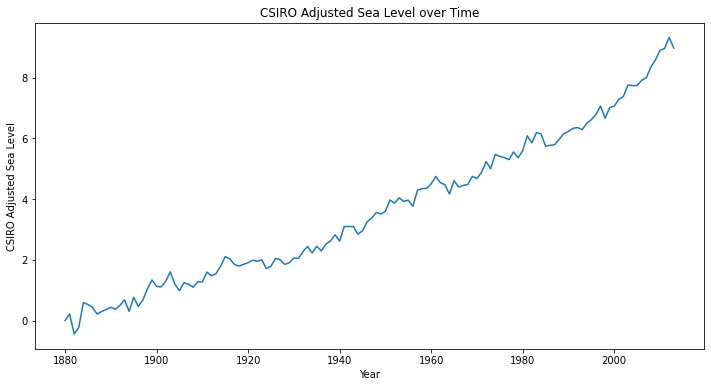

In [38]:
# Plot CSIRO Adjusted Sea Level over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='CSIRO Adjusted Sea Level')
plt.title('CSIRO Adjusted Sea Level over Time')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.show()

In [59]:
data = df_1[['Year', 'CSIRO Adjusted Sea Level']]
data.set_index('Year', inplace=True)
data.index = pd.date_range(start='1880-01-01', periods=len(data), freq='AS-JAN')
data

,CSIRO Adjusted Sea Level
1880-01-01,0.000000
1881-01-01,0.220472
1882-01-01,-0.440945
1883-01-01,-0.232283
1884-01-01,0.590551
...,...
2009-01-01,8.586614
2010-01-01,8.901575
2011-01-01,8.964567
2012-01-01,9.326772


**Stationarity of the Data**

We need stationarity in time series data to help us to make better predictions about future values by allowing us to more easily identify patterns and trends in the data.

In this part, we will check if the data is stationary using ADF (Augmented Dickey-Fuller) test which is a statistical test used to determine whether a time series data is stationary or non-stationary.

In [52]:
adf_test = ADFTest(alpha=0.05)
stationarity, p_value = adf_test.should_diff(data['CSIRO Adjusted Sea Level'])
print(f'Stationarity: {stationarity}, p-value: {p_value}')

Stationarity: 0.99, p-value: True


Based on the test, the data is stationary. We will now proceed to creating a Machine Learning Model. But first we will divide the dataset to data before 1990 and data from 1990.

In [53]:
data_before_1990 = data[data.index.year < 1990]
data_after_1990 = data[data.index.year >= 1990]

**EDA and Data Visualization**

In [68]:
def visualize_data(data, title):
    # CSIRO Adjusted Sea Level over Time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x=data.index, y='CSIRO Adjusted Sea Level')
    plt.title(f'{title} - CSIRO Adjusted Sea Level over Time')
    plt.xlabel('Year')
    plt.ylabel('CSIRO Adjusted Sea Level')
    plt.show()

    # Histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(data['CSIRO Adjusted Sea Level'], kde=True)
    plt.title(f'{title} - Histogram of CSIRO Adjusted Sea Level')
    plt.xlabel('CSIRO Adjusted Sea Level')
    plt.ylabel('Frequency')
    plt.show()

    # Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data['CSIRO Adjusted Sea Level'])
    plt.title(f'{title} - Box Plot of CSIRO Adjusted Sea Level')
    plt.xlabel('CSIRO Adjusted Sea Level')
    plt.show()

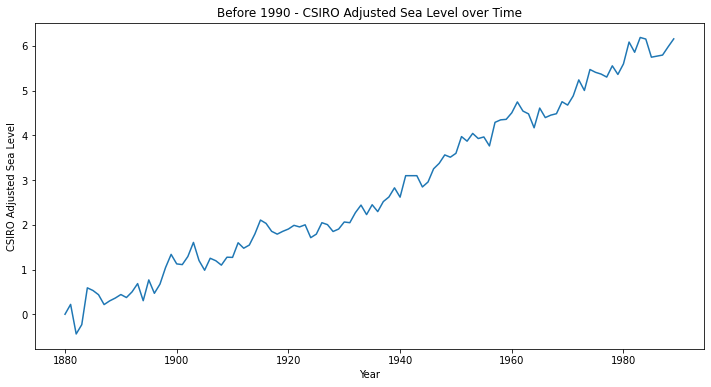

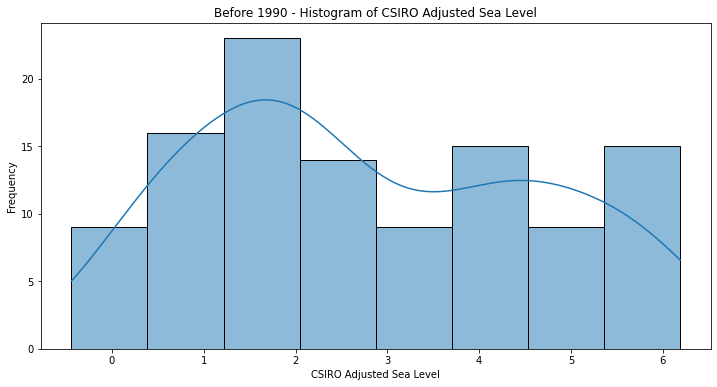

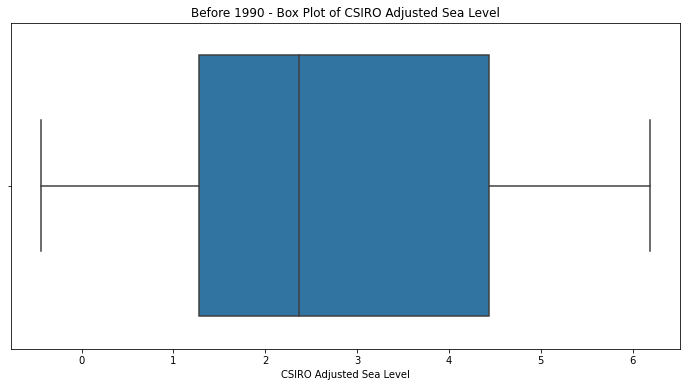

In [55]:
visualize_data(data_before_1990, 'Before 1990')

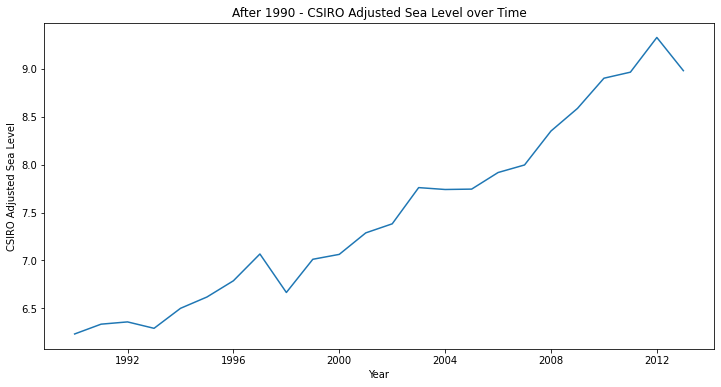

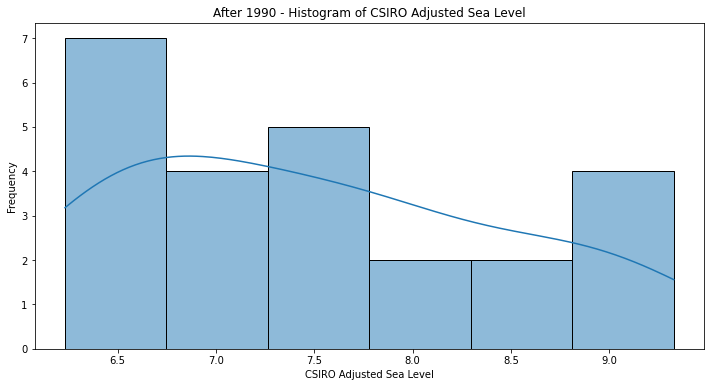

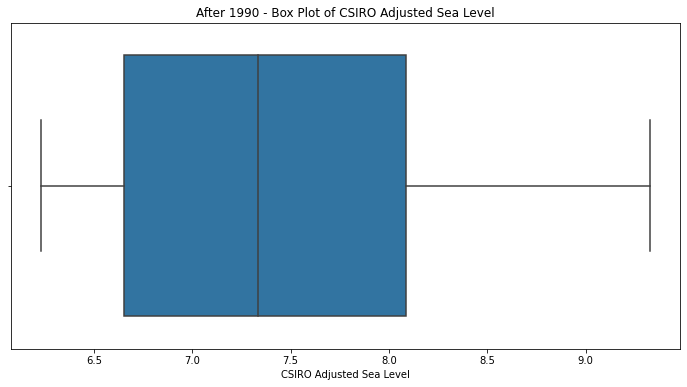

In [56]:
visualize_data(data_after_1990, 'After 1990')

### **Results**

**Before 1990**

Based on the plots in this visualization. The histogram shows that the data has a lot more of lower level values it is skewed to the right and the mean will be higher than the median value of the dataset. The histogram is bimodal in its distribution which means there are might be two distinct group or processes within the data. The data also shows it is relatively continous and there are no unrepresented intervals within the data.

The boxplots are also consistent with the histogram data.

**After 1990**

The plots still show that the data is skewed to the right and has a lower median compared to the mean. However the histogram shows that the data now has a unimodal distribution.

I will now check for the best ARIMA model and best order of parameters using the ***pdarima*** module.

In [57]:
best_order_before_1990 = auto_arima(data_before_1990['CSIRO Adjusted Sea Level'], seasonal=False, suppress_warnings=True, stepwise=True)
best_order_after_1990 = auto_arima(data_after_1990['CSIRO Adjusted Sea Level'], seasonal=False, suppress_warnings=True, stepwise=True)

print("Best ARIMA parameters for data before 1990:")
print(best_order_before_1990.summary())

print("Best ARIMA parameters for data after 1990:")
print(best_order_after_1990.summary())

Best ARIMA parameters for data before 1990:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(0, 1, 2)   Log Likelihood                  15.139
Date:                Thu, 16 Mar 2023   AIC                            -22.279
Time:                        14:13:31   BIC                            -11.513
Sample:                    01-01-1880   HQIC                           -17.913
                         - 01-01-1989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0566      0.008      7.229      0.000       0.041       0.072
ma.L1         -0.4399      0.121     -3.621      0.000      -0.678      -0.202
ma.L2   

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf

model_before_1990 = SARIMAX(data_before_1990['CSIRO Adjusted Sea Level'], order=(0, 1, 2)).fit()
model_after_1990 = SARIMAX(data_after_1990['CSIRO Adjusted Sea Level'], order=(1, 1, 0)).fit()



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [61]:
forecast_before_1990 = model_before_1990.forecast(steps=10)
forecast_after_1990 = model_after_1990.forecast(steps=10)

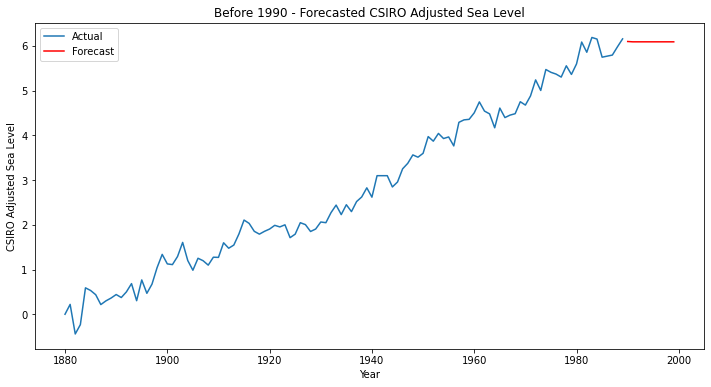

In [64]:
def visualize_forecasts(data, forecast, title):
    plt.figure(figsize=(12, 6))
    
    plt.plot(data.index, data['CSIRO Adjusted Sea Level'], label='Actual')
    plt.plot(forecast.index, forecast, color='red', label='Forecast')
    
    plt.title(f'{title} - Forecasted CSIRO Adjusted Sea Level')
    plt.xlabel('Year')
    plt.ylabel('CSIRO Adjusted Sea Level')
    plt.legend()
    plt.show()

visualize_forecasts(data_before_1990, forecast_before_1990, 'Before 1990')


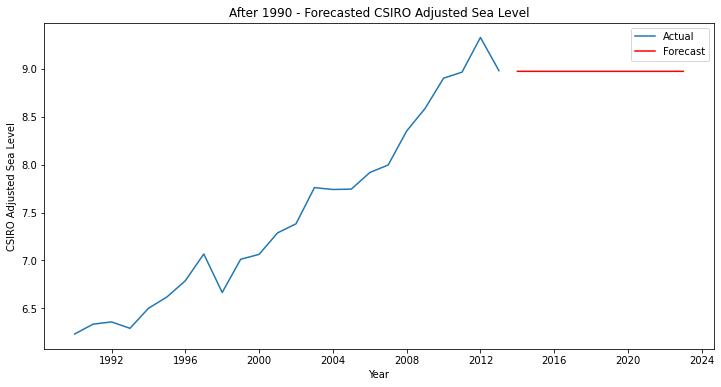

In [65]:
visualize_forecasts(data_after_1990, forecast_after_1990, 'After 1990')

In [66]:
def evaluate_model(model, data):
    # Calculate residuals
    residuals = data['CSIRO Adjusted Sea Level'] - model.fittedvalues

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(residuals**2))

    # Calculate mean absolute error (MAE)
    mae = np.mean(np.abs(residuals))

    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(np.abs(residuals / data['CSIRO Adjusted Sea Level'])) * 100

    # Calculate R and R-squared
    r, _ = pearsonr(data['CSIRO Adjusted Sea Level'], model.fittedvalues)
    r_squared = r**2

    print(f'RMSE: {rmse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'R: {r:.4f}')
    print(f'R²: {r_squared:.4f}')

print("Model performance for data before 1990:")
evaluate_model(model_before_1990, data_before_1990)

print("Model performance for data after 1990:")
evaluate_model(model_after_1990, data_after_1990)

Model performance for data before 1990:
RMSE: 0.2307
MAE: 0.1769
MAPE: 13.80%
R: 0.9929
R²: 0.9858
Model performance for data after 1990:
RMSE: 1.2923
MAE: 0.4429
MAPE: 6.57%
R: 0.7227
R²: 0.5223


# **Results**

Based on the results and the error metrics obtained, the data gathered prior to 1990, had very low error measures from the model like RMSE, MAE, and MAPE. The coefficient of determination (R2) was nearly perfect, showing that the model could account for virtually all of the variation in the data. The correlation (R) was high, indicating a strong relationship between projected and actual values.

With data gathered after 1990, however, the model proved less reliable; greater error metrics showed that the projected values were not as near to the actual values as before. As the model could only account for nearly half of the variation in the data, the correlation (R) and coefficient of determination (R2) were lower, showing a weaker correlation between the predicted and actual values.

# **My Conclusion**

It seems that the linear regression model is best suited for this analysis but I haven't tried other models as I do not want to do so as of now. I had a lot of fun doing and modifying this project plus I got a certificate out of it which is nice.